# COVID 19 Cases in Mexico City Data Cleanup & Exploration
***
### This notebook contains the exploration and cleaning process of various csv files provided by the Sistema Nacional de Vigilancia Epidemiologica in Mexico City

### Resource
- https://archivo.datos.cdmx.gob.mx/sinave-colonias/?C=M;O=A
-https://datos.cdmx.gob.mx/dataset/covid-19-sinave-ciudad-de-mexico-a-nivel-colonia

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes.</div>

<div class="alert alert-block alert-success">
<b>Success:</b> This alert box indicates a successful or positive action.
</div>

<div class="alert alert-block alert-danger">
<b>Danger:</b> This alert box indicates a dangerous or potentially negative action.
</div>

In [1]:
# Import packages and dependencies
import os
import glob
import pandas as pd
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
from matplotlib import colors
import io
import matplotlib.pyplot as plt
import calmap


# We configure pandas in order to see the complete rows and columns of our data frames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


ModuleNotFoundError: No module named 'calmap'

In [ ]:
# All files downloaded from the 
all_filenames = [i for i in glob.glob("Historico Sinave/*.csv")]
# all_filenames


## Exploration

First we must explore the structure of each csv, as we see in the data frame displayer below, we have Alcaldia (Delegación), Colonia and positive COVID 19 cases registered in that particular date, date format is based in YYMMDD.

In [ ]:
df_exploration = pd.read_csv(all_filenames[0])
df_exploration.head()

## Exploration part 2

Understanding that each csv file **contains different dates**, we must know what dates are registered in each csv file. With the help of a **for loop** we enter to each csv file and displayed all columns contained:

In [2]:
for f in all_filenames:
    print("---------------------")
    print("The file is "+ f)
    print(pd.read_csv(f).columns)
    

NameError: name 'all_filenames' is not defined

# Select files for 2020
Down below we can see a summary of the dates contained in each csv file, we are only interested in the data recorded for year 2020, so we will save this file names in a new list in order to merge them later

| File name | Date Range |
| :----| :----|
| 200731_base_historica.csv   | (20-06-29 al 20-07-31) |
| 200819_base_historica.csv | (20-08-01 al 20-08-19) |
| historico_sinave_sem1_ago20.csv | (20-08-20 al 20-08-26) |
| historico_sinave_sem2_ago20.csv | (20-08-27 al 20-09-02) |
| historico_sinave_sem36_ago20.csv | (20-08-31 al 20-09-06) |
| historico-sinave.csv | (20-09-05 al 20-12-13) |
| historico_sinave_sem51_dic20.csv | (20-12-14 al 20-12-20) |
| historico_sinave_sem52_dic20.csv | (20-12-21 al 20-12-27) |
| historico_sinave_sem53_dic20.csv | (20-12-28 al 21-01-03) |

In [3]:
file_names2020=['200731_base_historica.csv', '200819_base_historica.csv', 'historico_sinave_sem1_ago20.csv', 'historico_sinave_sem2_ago20.csv', 'historico_sinave_sem36_ago20.csv', 'historico-sinave.csv', 'historico_sinave_sem51_dic20.csv', 'historico_sinave_sem52_dic20.csv', 'historico_sinave_sem53_dic20.csv']

## Merging and Clean

The process to combine all csv files was through merge method and drop the extra lines added of *Alcaldia* and *Colonia*.
<br>
At the end we can see a final clean dropping some columns not needed and renaming some dates headers.

In [4]:
dfmerge=[]

dfmerge = pd.read_csv('Historico Sinave/'+file_names2020[0])
dfmerge = dfmerge.rename(columns={"colonia":"Colonia",'alcaldia':'Alcaldia'})
i=1

for f in file_names2020[1:]:
    
    df2=pd.read_csv('Historico Sinave/'+f)
    
    dfmerge = dfmerge.merge(df2, how="outer", on="clave_colonia")
    dfmerge.drop(['alcaldia','colonia'],axis=1, inplace=True)
    dfmerge.columns
    
    i += 1

    

dfmerge.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0','total_200831_y', 'total_200901_y', 
              'total_200902_y','total_200905_y', 'total_200906_y'],axis=1, inplace=True)

dfmerge=dfmerge.rename(columns={'total_200831_x':'total_200831', 'total_200901_x':'total_200901', 
                                'total_200902_x':'total_200902','total_200905_x':'total_200905', 
                                'total_200906_x':'total_200906'})


In [5]:
dfmerge.head()

,Alcaldia,Colonia,clave_colonia,total_200629,total_200630,total_200701,total_200702,total_200703,total_200704,total_200705,...,total_201225,total_201226,total_201227,total_201228,total_201229,total_201230,total_201231,total_210101,total_210102,total_210103
0,GUSTAVO A. MADERO,BENITO JUAREZ,05-011,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,17.0,15.0,17.0,16.0,21.0,21.0,23.0,24.0,24.0,23.0
1,GUSTAVO A. MADERO,CONSTITUCION DE LA REPUBLICA,05-029,8.0,7.0,NaN,NaN,NaN,NaN,NaN,...,44.0,38.0,37.0,31.0,32.0,31.0,30.0,26.0,23.0,17.0
2,GUSTAVO A. MADERO,CTM ATZACOALCO (U HAB),05-031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,30.0,31.0,28.0,22.0,23.0,20.0,20.0,22.0,20.0
3,GUSTAVO A. MADERO,CTM EL RISCO (U HAB),05-032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,33.0,28.0,25.0,22.0,22.0,17.0,17.0,14.0
4,GUSTAVO A. MADERO,CUCHILLA DEL TESORO,05-035,12.0,11.0,11.0,11.0,11.0,12.0,13.0,...,57.0,57.0,54.0,53.0,61.0,68.0,71.0,65.0,60.0,51.0


## Outliers

While doing the last plot, we saw a outlier of cases for the date (13/12/2020) with a total of **32,863 cases**.
<br>

When we display that particular day, we notice this value is only registered in one row, we excluded this day from the analysis as we want to see cases by each neighbourhood.

In [6]:
# Line 610
dfmerge[['Colonia','total_201213']]

,Colonia,total_201213
0,BENITO JUAREZ,NaN
1,CONSTITUCION DE LA REPUBLICA,NaN
2,CTM ATZACOALCO (U HAB),NaN
3,CTM EL RISCO (U HAB),NaN
4,CUCHILLA DEL TESORO,NaN
...,...,...
1584,NaN,NaN
1585,NaN,NaN
1586,NaN,NaN
1587,NaN,NaN


In [7]:
print(dfmerge['total_201213'].max())
del dfmerge['total_201213']

32863.0


## Unpivot Date columns

In order to transpose all date columns in one, we used the stack method containing all columns that we wanted to tranpose.

In [8]:
columns=list(dfmerge.columns)
columns.remove('Alcaldia')
columns.remove('Colonia')
# columns

In [9]:
new_df=dfmerge[columns].set_index('clave_colonia').stack().reset_index()
new_df=new_df.rename(columns={'clave_colonia':'Clave','level_1':'Fecha', 0:'Casos positivos'})
new_df['Fecha']=new_df['Fecha'].str.replace('total_','')

<AxesSubplot:xlabel='Fecha'>

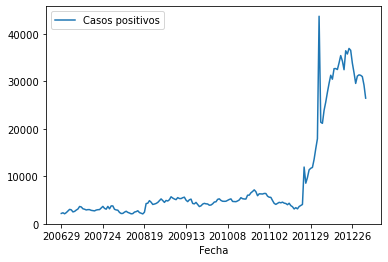

In [10]:
casos=new_df.groupby('Fecha').sum()
casos.plot()

## Export Clean Data Frame to csv

In [11]:
casos.to_csv('Covid 19 Average by Date')
new_df.to_csv('Covid 19 by Date')

## Extra

In [12]:
# 2020 csv files

# 200731_base_historica.csv (20-06-29 al 20-07-31)
# 200819_base_historica.csv (20-08-01 al 20-08-19)
# historico_sinave_sem1_ago20.csv (20-08-20 al 20-08-26)
# historico_sinave_sem2_ago20.csv (20-08-27 al 20-09-02)
# historico_sinave_sem36_ago20.csv (20-08-31 al 20-09-06)
# historico-sinave.csv (20-09-05 al 20-12-13)
# historico_sinave_sem51_dic20.csv (20-12-14 al 20-12-20)
# historico_sinave_sem52_dic20.csv (20-12-21 al 20-12-27)
# historico_sinave_sem53_dic20.csv (20-12-28 al 21-01-03)

# 2021 csv files
# historico_sinave_sem1_ene21.csv (21-01-04 AL 21-01-10)
# historico_sinave_sem2_ene21.csv (21-01-11 al 21-01-17)
# historico_sinave_sem3_ene21.csv (21-01-18 al 21-01-24)
# historico_sinave_sem4_ene21.csv (21-01-25 al 21-01-31)
# historico_sinave_sem5_ene21.csv (21-02-01 al 21-02-07)
# historico_sinave_sem6_feb21.csv (21-02-08 al 21-02-14)
# historico_sinave_sem7_feb21.csv (21-02-15 al 21-02-21)
# historico_sinave_sem8_feb21.csv (21-02-22 al 21-02-28)
# historico_sinave_sem9_feb21.csv (21-03-01 al 21-03-07)
# historico_sinave_sem10_mar21.csv
# historico_sinave_sem11_mar21.csv
# historico_sinave_sem12_mar21.csv

In [13]:
## Color Maped Casses

In [52]:
new_df['Fecha'] = pd.to_datetime(new_df['Fecha'], format='%y%m%d')
new_df

,Clave,Fecha,Casos positivos
0,05-011,2020-06-30,6.0
1,05-011,2020-09-03,8.0
2,05-011,2020-09-04,8.0
3,05-011,2020-09-05,7.0
4,05-011,2020-09-06,7.0
...,...,...,...
84949,10-170,2020-12-05,7.0
84950,12-014,2020-12-05,6.0
84951,12-059,2020-12-05,6.0
84952,12-084,2020-12-05,6.0


In [53]:
print(new_df.dtypes)

Clave                      object
Fecha              datetime64[ns]
Casos positivos           float64
dtype: object


In [56]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

all_days = pd.date_range('30/06/2020',  periods=185, freq='D')


In [63]:
casos_dia = new_df.groupby('Fecha')["Casos positivos"].sum()
casos_dia

Fecha
2020-06-29     2177.0
2020-06-30     2312.0
2020-07-01     2105.0
2020-07-02     2348.0
2020-07-03     2680.0
               ...   
2020-12-30    31351.0
2020-12-31    31251.0
2021-01-01    30980.0
2021-01-02    29200.0
2021-01-03    26444.0
Name: Casos positivos, Length: 184, dtype: float64

In [ ]:
semaforo = 

<AxesSubplot:>

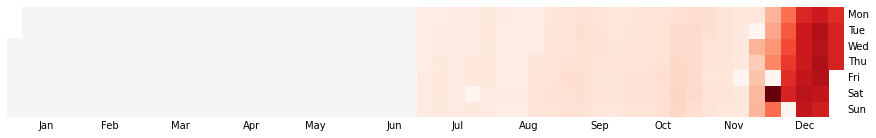

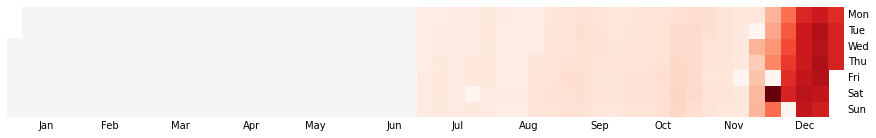

In [84]:
f1, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(casos_dia, year=2020, linewidth=0)

f2, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(casos_dia, year=2020, linewidth=0)


(<Figure size 576x288 with 1 Axes>,
 array([<AxesSubplot:ylabel='2020'>], dtype=object))

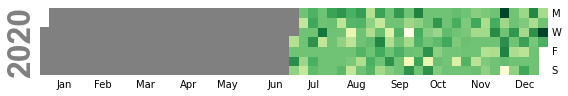

In [67]:
calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(8, 4)))